In [18]:
import pandas as pd
#import world covid cases
df_covid_cases = pd.read_csv('../datasets/COVID-19-geographic-disbtribution-worldwide-2020-08-01.csv',delimiter=';', keep_default_na=False, na_values=[''])
df_covid_cases.dtypes
# cast datetime
df_covid_cases['dateRep'] = pd.to_datetime(df_covid_cases['dateRep'], format="%d/%m/%Y")
df_covid_cases.head()
#adding percentage cases per population
df_covid_cases['PercentaceCasesOverPop'] = (df_covid_cases['cases']/df_covid_cases['popData2019'])*100
df_covid_cases.head()
df_covid_cases['week_start'] = df_covid_cases['dateRep'] - df_covid_cases['dateRep'].dt.weekday.astype('timedelta64[D]')
week_number = df_covid_cases['week_start'].dt.week
df_covid_cases['week_number'] = week_number
df_covid_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,PercentaceCasesOverPop,week_start,week_number
0,2020-08-01,1,8,2020,168,12,Afghanistan,AF,AFG,38041757.0,Asia,3.735369,0.000442,2020-07-27,31
1,2020-07-31,31,7,2020,71,0,Afghanistan,AF,AFG,38041757.0,Asia,3.869432,0.000187,2020-07-27,31
2,2020-07-30,30,7,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.882576,0.000000,2020-07-27,31
3,2020-07-29,29,7,2020,103,1,Afghanistan,AF,AFG,38041757.0,Asia,4.550263,0.000271,2020-07-27,31
4,2020-07-28,28,7,2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia,5.028685,0.000276,2020-07-27,31


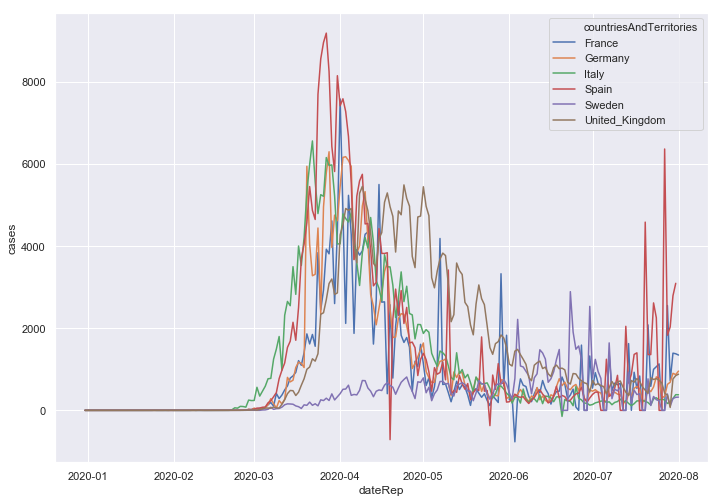

In [19]:
# plot main european countries: {Italy,France,Germany,UK,SPAIN}
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

df_covid_cases_main_eu = df_covid_cases.loc[df_covid_cases['countriesAndTerritories'].isin(['Italy','France','Germany','Italy','Spain','United_Kingdom','Sweden'])]
#print(df_covid_cases_main_eu.head())
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="dateRep", y="cases", hue="countriesAndTerritories",
                  data=df_covid_cases_main_eu)


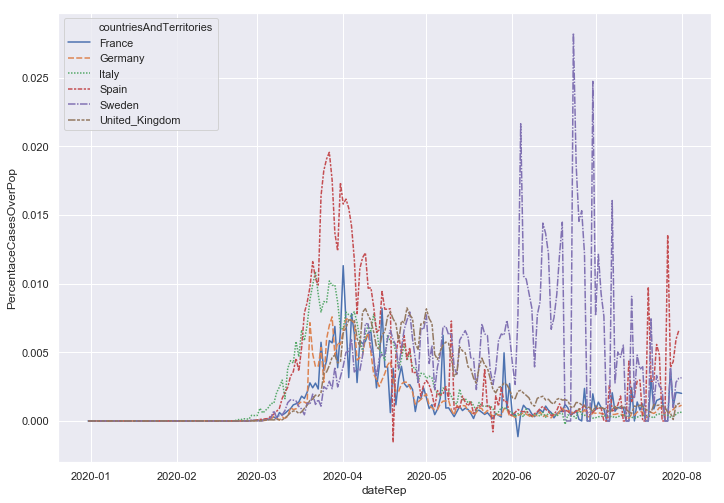

In [20]:
#percentage cases on population
ax = sns.lineplot(x="dateRep", y="PercentaceCasesOverPop", hue="countriesAndTerritories", style="countriesAndTerritories",
                  data=df_covid_cases_main_eu)

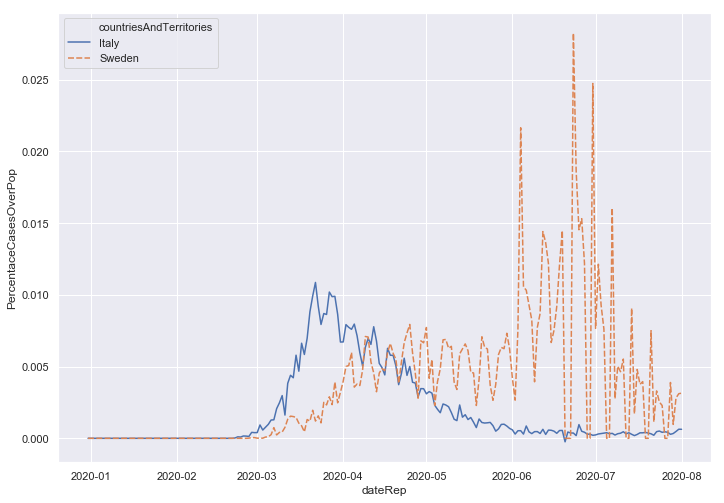

In [21]:
#Sweden and Italy
df_covid_cases_main_eu = df_covid_cases.loc[df_covid_cases['countriesAndTerritories'].isin(['Italy','Sweden'])]
ax = sns.lineplot(x="dateRep", y="PercentaceCasesOverPop", hue="countriesAndTerritories", style="countriesAndTerritories",
                  data=df_covid_cases_main_eu)

In [ ]:
# box plot time period

# group by week_number

In [22]:
df_covid_cases.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,PercentaceCasesOverPop,week_start,week_number
0,2020-08-01,1,8,2020,168,12,Afghanistan,AF,AFG,38041757.0,Asia,3.735369,0.000442,2020-07-27,31
1,2020-07-31,31,7,2020,71,0,Afghanistan,AF,AFG,38041757.0,Asia,3.869432,0.000187,2020-07-27,31
2,2020-07-30,30,7,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.882576,0.000000,2020-07-27,31
3,2020-07-29,29,7,2020,103,1,Afghanistan,AF,AFG,38041757.0,Asia,4.550263,0.000271,2020-07-27,31
4,2020-07-28,28,7,2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia,5.028685,0.000276,2020-07-27,31


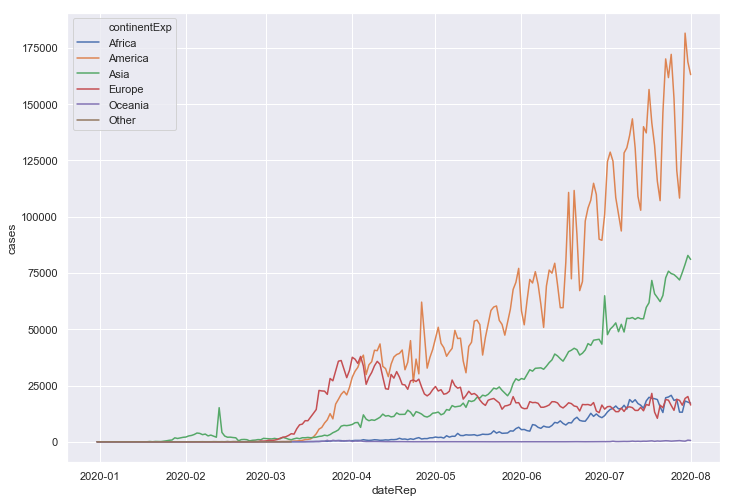

In [48]:
# line plot by continent
import pandasql

df_covid_cases_grouping_cont = pandasql.sqldf("select dateRep, "
                                              "sum(cases) as cases, "
                                              "sum(deaths) as deaths,"
                                              "week_number,"
                                              "sum(popData2019) as popData2019, "
                                              "continentExp "
                                              "from df_covid_cases "
                                              "group by continentExp,dateRep",locals())
df_covid_cases_grouping_cont['PercentaceCasesOverPopCont'] = (df_covid_cases_grouping_cont['cases']/df_covid_cases_grouping_cont['popData2019'])*100
df_covid_cases_grouping_cont['dateRep'] = pd.to_datetime(df_covid_cases_grouping_cont['dateRep'], format="%Y-%m-%d %H:%M:%S")
#print(df_covid_cases_grouping_cont.head())
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="dateRep", y="cases", hue="continentExp",
                  data=df_covid_cases_grouping_cont)

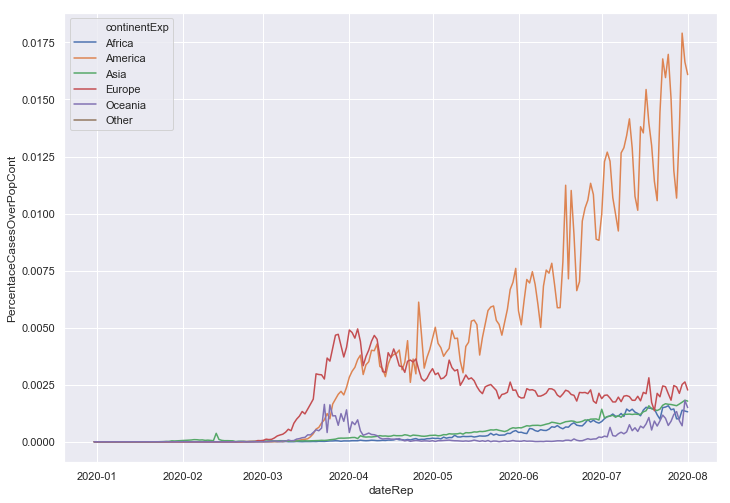

In [49]:
# percentage over population
ax = sns.lineplot(x="dateRep", y="PercentaceCasesOverPopCont", hue="continentExp",
                  data=df_covid_cases_grouping_cont)

In [50]:
df_covid_cases_grouping_cont.head()
# #df_covid_cases_grouping_cont['dateRep'].astype(str).str[10].head()
# df_covid_cases_grouping_cont['dateRep'] = pd.to_datetime(df_covid_cases_grouping_cont['dateRep'], format="%Y-%m-%d %H:%M:%S")
# print(min(df_covid_cases_grouping_cont['dateRep']))

,dateRep,cases,deaths,week_number,popData2019,continentExp,PercentaceCasesOverPopCont
0,2019-12-31,0,0,1,344404733.0,Africa,0.0
1,2020-01-01,0,0,1,344404733.0,Africa,0.0
2,2020-01-02,0,0,1,344404733.0,Africa,0.0
3,2020-01-03,0,0,1,344404733.0,Africa,0.0
4,2020-01-04,0,0,1,344404733.0,Africa,0.0
